# Project: Wrangling and Analyze Data

## Table of contents
1. [Introduction](#intro)
2. [Data Gathering](#DGA)
3. [Assessing Data](#Asess)
4. [Cleaning Data](#Clean)
5. [Storing Data](#store)
6. [Analyzing and visualizing Data](#visual)

## Introduction
This project entails data wrangling; gathering, assessing, cleaning and analyzing twitter post from WeRateDogs. WeRateDogs is a twitter account that rates people's dogs with humorous comment about dog.

## Data Gathering

In [1]:
#import libraries
import numpy as np
import pandas as pd
import json
import requests
import tweepy
from tweepy import OAuthHandler
import os
import json
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load twitter archive enhanced
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Get the tweet image prediction(image_predictions.tsv)
#make directory for folder
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#Download image prediction to computer
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [4]:
#read the content of image prediction
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
#check the status of response
response.status_code

200

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [6]:
##load tweets json into list
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [7]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
#load the tweet json into a dataframe
df_tweet = pd.DataFrame(df_list, columns = ['id',
                                            'retweet_count',
                                            'favorite_count'])

In [9]:
#print the tweet dataframe
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
#save the dataframe to a csv file 
df_tweet.to_csv('df_tweet.csv', index=False)

In [11]:
#checking
df = pd.read_csv('df_tweet.csv')
df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

In [12]:
#Virtual assessment of the twitter archive data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
#Programmatic assessment 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#count timestamp column value
twitter_archive.timestamp.value_counts()

2015-11-24 03:29:51 +0000    1
2017-07-09 00:00:04 +0000    1
2015-12-27 02:36:20 +0000    1
2016-03-15 02:25:31 +0000    1
2016-08-21 02:47:37 +0000    1
                            ..
2015-11-18 00:36:17 +0000    1
2017-01-01 19:22:38 +0000    1
2017-07-02 21:58:53 +0000    1
2016-09-21 00:00:35 +0000    1
2016-11-19 16:49:49 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [15]:
#check the unique value of source column
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
#check the unique value of text column
twitter_archive.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

In [17]:
#check the unique value of name column
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
#count the value of name column
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Barry        1
O            1
Dallas       1
Rontu        1
Glenn        1
Name: name, Length: 957, dtype: int64

In [19]:
#Virtual assessment of the image prediction data
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
#Programmatic assessment of image prediction
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Check jpg_url column for any duplicated images
image_prediction.jpg_url.duplicated().sum()

66

In [22]:
#check p1 unique values
image_prediction.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [23]:
#count the values of p1
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hammer                  1
bonnet                  1
toilet_seat             1
sandbar                 1
timber_wolf             1
Name: p1, Length: 378, dtype: int64

In [24]:
#check p2 unique values
image_prediction.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [25]:
#count the p2 values
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
ice_lolly               1
banded_gecko            1
lighter                 1
snorkel                 1
patio                   1
Name: p2, Length: 405, dtype: int64

In [26]:
#check p3 unique values
image_prediction.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [27]:
#count the p3 values
image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
snorkel                1
can_opener             1
otter                  1
triceratops            1
paintbrush             1
Name: p3, Length: 408, dtype: int64

In [28]:
#Virtual assessment of tweet data
df_tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [29]:
#Programmatic assessment
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
# Check how many tweets are retweets
df_tweet.duplicated().sum()

0

### Quality issues
#### Twitter archive table
1. Timestamp column in Twitter archive is an object instead of a datetime.

2. Source column is html tagged.

3. Text contains ratings and links

4. In_reply_to_status_id should be removed.

5. retweeted columns should be removed.

6. Some name columns entries are not name.


#### Image prediction table
7. jpg_url column in image prediction has 66 duplicated values.

8. p1_dog, p2_dog, p3_dog contain false dog rows.

#### df tweet table
9. retweet recount should be removed

### Tidiness issues
1. doggo, floofer, pupper, puppo columns should be in single column in the twitter archive table

2. All datasets should be combined into one dataset

## Cleaning Data

In [31]:
# Create copies of the original DataFrames
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
df_tweet_clean = df_tweet.copy()

### Issue 1: 
Timestamp Datatype

#### Define: 
Convert Timestamp column to a datetime

#### Code

In [32]:
#covert timestamp column to a datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [33]:
#verify timestamp column data type
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #2: html in source column

#### Define 
Remove HTML from rows in source column

### Code

In [34]:
def fix_source(x):
    'x is an html string from the source column in twitter archive clean dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [35]:
#convert source column to a categorical data
twitter_archive_clean.source = twitter_archive_clean.source.apply(lambda x: fix_source(x)).astype('category')

#### Test

In [36]:
#check for source column unique value
twitter_archive_clean.source.unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

In [37]:
#check for source column value count
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #3: 
Text column has ratings and links

#### Define 
Remove ratings and links from text column using Regex.

### Code

In [38]:
#extract the ratings and link from text column
twitter_archive_clean.text = twitter_archive_clean.text.str.extract('(.+(?=\s\d+/\d+\s))')

### Test

In [39]:
#verify if text column contain links
twitter_archive_clean.text.sample(5)

1809    Meet Ash. He's just a head now. Lost his body ...
265     This is Bentley. It's his first time going to ...
2353    Here is a very happy pup. Big fan of well-main...
914     Here's a doggo completely oblivious to the dou...
1414    This is Cuddles. He's not entirely sure how do...
Name: text, dtype: object

### Issue #4,5:
Retweeted columns and reply columns

#### Define 
Remove rows that have values in the retweeted columns and then drop retweeted columns and reply columns

### Code

In [41]:
# Remove rows that have values in the retweeted columns
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

In [42]:
# drop retweeted columns and reply columns
cols = ['retweeted_status_id', 
        'retweeted_status_user_id',  
        'retweeted_status_timestamp',
        'in_reply_to_status_id','in_reply_to_user_id']
twitter_archive_clean.drop(columns = cols, axis=1, inplace=True)

### Test

In [43]:
#recheck twitter_archive info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null category
text                  2066 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 206.2+ KB


### Issue 6:
Invalid names column

#### Define
Remove entries in the name column that are invalid such as 'a', 'an','none', 'the' words

### Code

In [44]:
# Use a regex to find name entries that are uppercase
twitter_archive_clean['name'] = twitter_archive_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

In [45]:
# Drop any remaining rows that contain NaN and None in the name column
twitter_archive_clean.dropna(subset=['name'], inplace=True)
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'None']

### Test

In [46]:
#check name column value count
twitter_archive_clean['name'].value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
            ..
Covach       1
Adele        1
Hall         1
Florence     1
Buddah       1
Name: name, Length: 930, dtype: int64

### Issue 7:

#### Define
Remove duplicated rows in jpg_url

### Code

In [47]:
# Drop duplicated rows in jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates('jpg_url')

### Test

In [48]:
#Verify that duplicated rows in jpg_url column has been removed
image_prediction_clean.jpg_url.duplicated().sum()

0

### Issue 8:

#### Define
Drop rows with entries of false dogs in P1_dog, p2_dog and p3_dog columns

### Code

In [49]:
# Only keep rows with entries that have p1_dog, p2_dog, & p3_dog values set to True
image_prediction_clean = image_prediction_clean[((image_prediction_clean['p1_dog'] == True) & 
                  (image_prediction_clean['p2_dog'] == True) & 
                  (image_prediction_clean['p3_dog'] == True))]

### Test

In [50]:
# Verify that entries with p1_dog, p2_dog, & p3_dog set to False have been removed
image_prediction_clean[((image_prediction_clean['p1_dog'] == False) & 
                  (image_prediction_clean['p2_dog'] == False) & 
                  (image_prediction_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue 9:

#### Define
change twitter_id column name to id

In [51]:
#change tweet_id column in twitter_archive and image_prediction to id
twitter_archive_clean = twitter_archive_clean.rename(columns={'tweet_id':'id'})
image_prediction_clean = image_prediction_clean.rename(columns={'tweet_id':'id'})

### Test

In [52]:
#verify that tweet_id has been changed
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 12 columns):
id                    1391 non-null int64
timestamp             1391 non-null datetime64[ns, UTC]
source                1391 non-null category
text                  1367 non-null object
expanded_urls         1391 non-null object
rating_numerator      1391 non-null int64
rating_denominator    1391 non-null int64
name                  1391 non-null object
doggo                 1391 non-null object
floofer               1391 non-null object
pupper                1391 non-null object
puppo                 1391 non-null object
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 132.0+ KB


In [53]:
#verify that tweet_id has been changed
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 12 columns):
id         1206 non-null int64
jpg_url    1206 non-null object
img_num    1206 non-null int64
p1         1206 non-null object
p1_conf    1206 non-null float64
p1_dog     1206 non-null bool
p2         1206 non-null object
p2_conf    1206 non-null float64
p2_dog     1206 non-null bool
p3         1206 non-null object
p3_conf    1206 non-null float64
p3_dog     1206 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 97.8+ KB


### Issue 9:
Drop retweet count column in the df_tweet table

### Code

In [54]:
#Drop retweet count column
df_tweet_clean.drop('retweet_count', axis = 1, inplace=True)

### Test

In [55]:
#recheck df_tweet 
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2)
memory usage: 36.9 KB


### Tidiness

### Issue 1:

#### Define
Combine the four(4) dogs 'doggo','floofer', 'pupper' and 'puppo' in one column called dog stage

In [56]:
# Replace the None with empty string
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')


# Combine the columns into a column called dog stage
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [57]:
# drop the 4 columns
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns = cols_to_drop, axis =1)

In [58]:
#separate the doggopupper row
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

### Test

In [59]:
#recheck twitter_archive info for dog_stage column
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 9 columns):
id                    1391 non-null int64
timestamp             1391 non-null datetime64[ns, UTC]
source                1391 non-null category
text                  1367 non-null object
expanded_urls         1391 non-null object
rating_numerator      1391 non-null int64
rating_denominator    1391 non-null int64
name                  1391 non-null object
dog_stage             1391 non-null object
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 99.4+ KB


### Issue 2:

#### Define
Merge all dataset into one dataframe called df_archive

In [60]:
# Merge the twitter_archive, image_prediction, and df_tweet tables into a single data frame
df_archive = pd.merge(twitter_archive_clean, image_prediction_clean, on='id')
df_archive = pd.merge(df_archive, df_tweet_clean, on='id')

### Test

In [61]:
#verify that df_archive has been merged
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 21 columns):
id                    852 non-null int64
timestamp             852 non-null datetime64[ns, UTC]
source                852 non-null category
text                  835 non-null object
expanded_urls         852 non-null object
rating_numerator      852 non-null int64
rating_denominator    852 non-null int64
name                  852 non-null object
dog_stage             852 non-null object
jpg_url               852 non-null object
img_num               852 non-null int64
p1                    852 non-null object
p1_conf               852 non-null float64
p1_dog                852 non-null bool
p2                    852 non-null object
p2_conf               852 non-null float64
p2_dog                852 non-null bool
p3                    852 non-null object
p3_conf               852 non-null float64
p3_dog                852 non-null bool
favorite_count        852 non-null int64
dtypes

## Storing Data


In [62]:
# Store the df_archive DataFrame in csv file called "twitter_archive_master"
df_archive.to_csv('twitter_archive_master.csv', 
                         index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data


In [63]:
#load twitter_archive master for analyses and visualization
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

#### Insight 1:
The relationship between dog_stage and Favorite_counts

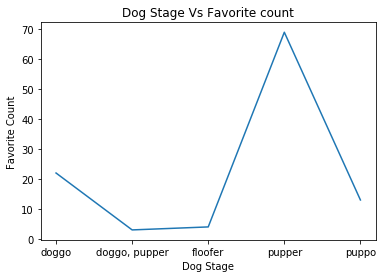

In [64]:
data = twitter_archive_master.groupby('dog_stage')['favorite_count'].count()
ax = sns.lineplot(x=data.index, y=data.values, palette='deep')
ax.set(xlabel='Dog Stage', ylabel='Favorite Count', title='Dog Stage Vs Favorite count')
plt.show()

* Pupper in the dog stage has the highest favorite count.

### Insight 2:
Highest occurrence of each dogs name in the tweet

In [65]:
#check for the highest name 
twitter_archive_master.name.value_counts()

Cooper      9
Charlie     8
Oliver      7
Koda        6
Sadie       6
           ..
Chipson     1
Rinna       1
Maxaroni    1
Gustav      1
Poppy       1
Name: name, Length: 632, dtype: int64

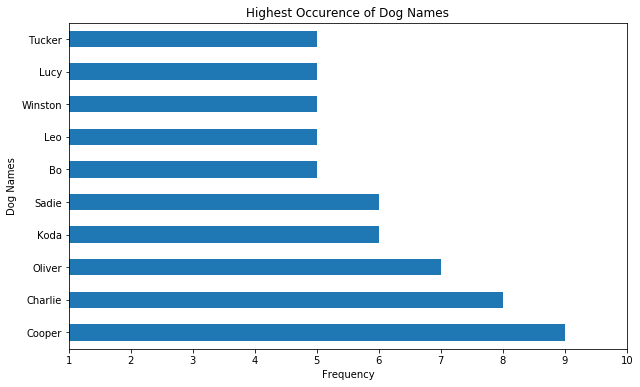

In [66]:
#plot the highest occurence of dog name
plt.figure(figsize=(10, 6))
dog_names = twitter_archive_master.name.value_counts().nlargest(10).plot(kind = 'barh');
dog_names.set_title('Highest Occurence of Dog Names');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Names');
dog_names.set_xlim(1, 10);

Copper has the highest occurence

### Insight 3:
Highest rated dog name

In [67]:
#Take summary statistics of rating numerator
twitter_archive_master.rating_numerator.describe()

count    852.000000
mean      11.070423
std        2.218334
min        2.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       50.000000
Name: rating_numerator, dtype: float64

In [68]:
#check for highest rated dog name
rated_dog= twitter_archive_master.groupby('name')['rating_numerator'].mean().nlargest(10)
rated_dog

name
Bluebert    50.0
Sam         24.0
Sophie      15.0
Cermet      14.0
Doobert     14.0
Emmy        14.0
Kuyu        14.0
Ollie       14.0
Sundance    14.0
Gary        13.5
Name: rating_numerator, dtype: float64

* Bluebert is the highest rated dog name amongst others

In [69]:
# Top 10 most frequent p1 dog breed predictions 
twitter_archive_master.p1.value_counts().nlargest(10)

golden_retriever      77
Pembroke              56
Labrador_retriever    50
Chihuahua             38
pug                   26
toy_poodle            20
Pomeranian            20
malamute              19
chow                  18
French_bulldog        17
Name: p1, dtype: int64

* The most frequent p1 dog breed is golden retriever

In [70]:
# Top 10 most frequent p2 dog breed predictions 
twitter_archive_master.p2.value_counts().nlargest(10)

Labrador_retriever          46
Cardigan                    46
golden_retriever            40
French_bulldog              21
miniature_poodle            20
collie                      20
Chesapeake_Bay_retriever    19
Pomeranian                  19
Eskimo_dog                  19
toy_poodle                  19
Name: p2, dtype: int64

* The most frequent p2 dog breed are the Labrador retriever and Cardigan

In [71]:
# Top 10 most frequent p3 dog breed predictions 
twitter_archive_master.p3.value_counts().nlargest(10)

Labrador_retriever           46
Chihuahua                    37
kelpie                       24
beagle                       20
golden_retriever             20
Pekinese                     20
Eskimo_dog                   20
malamute                     19
cocker_spaniel               19
Staffordshire_bullterrier    19
Name: p3, dtype: int64

* The most frequent p3 dog bread is the Labrador retriever 